In [2]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
netflix_df=pd.read_csv("netflix.csv")
netflix_df
df=netflix_df.copy()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Missing Value Detection**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [33]:
missing_data=df.isna().sum().to_frame()
missing_data.rename(columns={0:"Null_Value_Cnt"},inplace=True)
missing_data["Null_Value_Percentage"]=round(missing_data["Null_Value_Cnt"]*100/len(df),2)

In [34]:
missing_data

,Null_Value_Cnt,Null_Value_Percentage
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


## **Observation : There is almost 30% data missing from director column .Followed By the country and cast with over 9% of its data missing**

In [35]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# **Missing values Treatment and transformation  of  some of the Basic metric columns**

In [36]:
df["Date"]=pd.to_datetime(df["date_added"])
df["Month"]=df["Date"].dt.month_name()
df["Mon"]=df["Date"].dt.month
df["Mon"].replace(to_replace=NaN,value=0,inplace=True)
df["Year"]=df["Date"].dt.year
df["Year"].replace(to_replace=NaN,value=0,inplace=True)
df["director"].replace(to_replace=NaN,value="X",inplace=True)
df["cast"].replace(to_replace=NaN,value="X",inplace=True)
df["Year"]=df["Year"].astype("int")
df["Mon"]=df["Mon"].astype("int")

In [37]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,Month,Mon,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,X,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,September,9,2021
1,s2,TV Show,Blood & Water,X,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,September,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,September,9,2021
3,s4,TV Show,Jailbirds New Orleans,X,X,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,September,9,2021
4,s5,TV Show,Kota Factory,X,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,September,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,November,11,2019
8803,s8804,TV Show,Zombie Dumb,X,X,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,July,7,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,November,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,January,1,2020


# **Analyse the amount of content added in the platform Yearly and Monthly**

In [38]:
df.groupby(["Year","type"])["type"].count()

Year  type   
0     TV Show      10
2008  Movie         1
      TV Show       1
2009  Movie         2
2010  Movie         1
2011  Movie        13
2012  Movie         3
2013  Movie         6
      TV Show       5
2014  Movie        19
      TV Show       5
2015  Movie        56
      TV Show      26
2016  Movie       253
      TV Show     176
2017  Movie       839
      TV Show     349
2018  Movie      1237
      TV Show     412
2019  Movie      1424
      TV Show     592
2020  Movie      1284
      TV Show     595
2021  Movie       993
      TV Show     505
Name: type, dtype: int64

In [39]:
trend_year=df.groupby(["Year","type"])["type"].count().to_frame()
trend_year.rename(columns={"type":"count"},inplace=True)
trend_year.reset_index(inplace=True)
trend_year.loc[trend_year["Year"]==0]
trend_year.drop(0,axis=0,inplace=True)
trend_year

,Year,type,count
1,2008,Movie,1
2,2008,TV Show,1
3,2009,Movie,2
4,2010,Movie,1
5,2011,Movie,13
6,2012,Movie,3
7,2013,Movie,6
8,2013,TV Show,5
9,2014,Movie,19
10,2014,TV Show,5


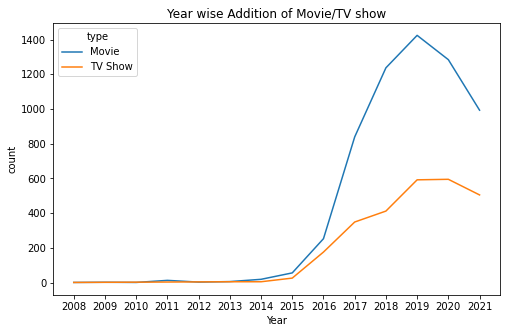

In [41]:
plt.rcParams["figure.figsize"] = (8,5)
plt.xticks(np.arange(2008,2022,1))
plt.title("Year wise Addition of Movie/TV show")
sns.lineplot(x="Year",y="count",data=trend_year,hue="type")
plt.show()

## **Observation :There is an Exponential increase in the number of Movies/TV shows added from 2015-2019.But past two years this has dropped.Most possible reason is Covid.**

In [42]:
trend_mon=df.groupby(["Mon","Month","type"])["type"].count().to_frame()
trend_mon.rename(columns={"type":"count"},inplace=True)
trend_mon.reset_index(inplace=True)
trend_mon

,Mon,Month,type,count
0,1,January,Movie,546
1,1,January,TV Show,192
2,2,February,Movie,382
3,2,February,TV Show,181
4,3,March,Movie,529
5,3,March,TV Show,213
6,4,April,Movie,550
7,4,April,TV Show,214
8,5,May,Movie,439
9,5,May,TV Show,193


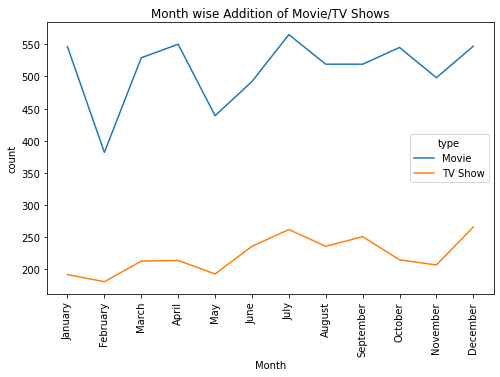

In [500]:
plt.rcParams["figure.figsize"] = (8,5)
plt.xticks(rotation=90)
plt.title("Month wise Addition of Movie/TV Shows")
sns.lineplot(x="Month",y="count",data=trend_mon,hue="type")
plt.show()

## **Observation :Both movie and TV show follows almost a similar trend where July has most number of movie/TV shows added to Netflix and February the least**

# **Nested Column Unpacking(Director,Country,Listed In )**

In [43]:
director_lst=df["director"].apply(lambda x:str(x).split(", ")).to_list()
director_lst



[['Kirsten Johnson'],
 ['X'],
 ['Julien Leclercq'],
 ['X'],
 ['X'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['X'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['X'],
 ['X'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['X'],
 ['Adam Salky'],
 ['X'],
 ['Olivier Megaton'],
 ['X'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['X'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['X'],
 ['X'],
 ['X'],
 ['X'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['X'],
 ['George Nolfi'],
 ['X'],
 ['X'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['X'],
 ['X'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 ['Toshiya Shin

In [44]:
director_df=pd.DataFrame(director_lst,index=df["show_id"])
director_df=director_df.stack()

director_df=pd.DataFrame(director_df)
director_df.reset_index(inplace=True)
director_df=director_df[["show_id",0]]
director_df.columns=["show_id","director"]
director_df=director_df.merge(df[["show_id","title","type"]])
director_df.describe(include="object")


,show_id,director,title,type
count,9612,9612,9612,9612
unique,8807,4994,8807,2
top,s5888,X,Walt Disney Animation Studios Short Films Coll...,Movie
freq,13,2634,13,6854


In [65]:
dir_con

,show_id,director,title,type,country
0,s1,Kirsten Johnson,Dick Johnson Is Dead,Movie,United States
1,s8,Haile Gerima,Sankofa,Movie,United States
2,s8,Haile Gerima,Sankofa,Movie,Ghana
3,s8,Haile Gerima,Sankofa,Movie,Burkina Faso
4,s8,Haile Gerima,Sankofa,Movie,United Kingdom
...,...,...,...,...,...
8465,s8802,Majid Al Ansari,Zinzana,Movie,Jordan
8466,s8803,David Fincher,Zodiac,Movie,United States
8467,s8805,Ruben Fleischer,Zombieland,Movie,United States
8468,s8806,Peter Hewitt,Zoom,Movie,United States


In [46]:
country_lst=df["country"].apply(lambda x:str(x).split(", ")).to_list()
country_lst

[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['nan'],
 ['Germany', 'Czech Republic'],
 ['nan'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', 'United States', 'Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['J

In [47]:
country_df=pd.DataFrame(country_lst,index=df["show_id"])
country_df=country_df.stack()

country_df=pd.DataFrame(country_df)
country_df.reset_index(inplace=True)
country_df=country_df[["show_id",0]]
country_df.columns=["show_id","country"]
country_df=country_df.merge(df[["show_id","title","type"]])
country_df["country"].value_counts(dropna=False).sort_values(ascending=False)




United States     3689
India             1046
nan                831
United Kingdom     804
Canada             445
                  ... 
Sudan                1
Jamaica              1
Somalia              1
Kazakhstan           1
Montenegro           1
Name: country, Length: 128, dtype: int64

In [67]:
country_df["country"].describe(include="object")
country_df["country"].value_counts(dropna=False).sort_values(ascending=False).head(10)

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

## **Observation- 127 Unique Countries(Missing Excluded) .The top 10 countries are lised above based on the amount of content**

In [50]:
listed_lst=df["listed_in"].apply(lambda x:str(x).split(", ")).to_list()
listed_lst

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British TV Shows', 'Crime TV Shows', 'Docuseries'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International

In [52]:
listed_df=pd.DataFrame(listed_lst,index=df["show_id"])
listed_df=listed_df.stack()

listed_df=pd.DataFrame(listed_df)
listed_df.reset_index(inplace=True)
listed_df=listed_df[["show_id",0]]
listed_df.columns=["show_id","listed"]
listed_df=listed_df.merge(df[["show_id","title","type"]])
x=listed_df.groupby(["type","listed"])["listed"].count().to_frame()
x.rename(columns={"listed":"count"},inplace=True)
x.reset_index("listed",inplace=True)
x_movie=x.loc["Movie"]
x_tv=x.loc["TV Show"]

# **Analyse content added in the platform based on their Genre**

In [144]:
x_movie
x_tv

,listed,count
type,,
TV Show,Anime Series,176
TV Show,British TV Shows,253
TV Show,Classic & Cult TV,28
TV Show,Crime TV Shows,470
TV Show,Docuseries,395
TV Show,International TV Shows,1351
TV Show,Kids' TV,451
TV Show,Korean TV Shows,151
TV Show,Reality TV,255


In [150]:
x_movie_val1=x_movie["listed"].to_list()
x_movie_val2=x_movie["count"].to_list()

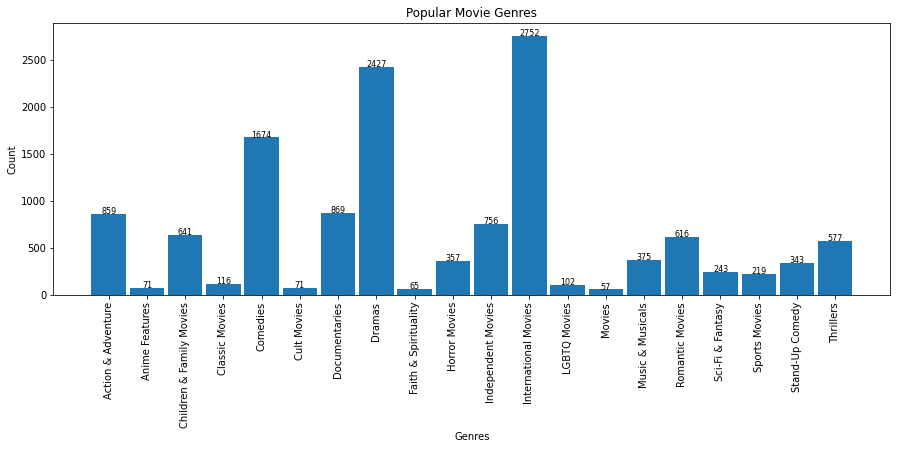

In [201]:
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(x_movie_val1,x_movie_val2,width=.9)
plt.xticks(x_movie_val1,rotation=90)
plt.title("Popular Movie Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
for idx,val in enumerate(x_movie_val2):
    plt.text(idx,val+.2,str(val),fontsize=8,ha="center")
plt.show()

## **Observation :Popular Movie Genres-International,Drama,Comedy,Documentries,Action and Adventure.**

In [202]:
x_tv_val1=x_tv["listed"].to_list()
x_tv_val2=x_tv["count"].to_list()

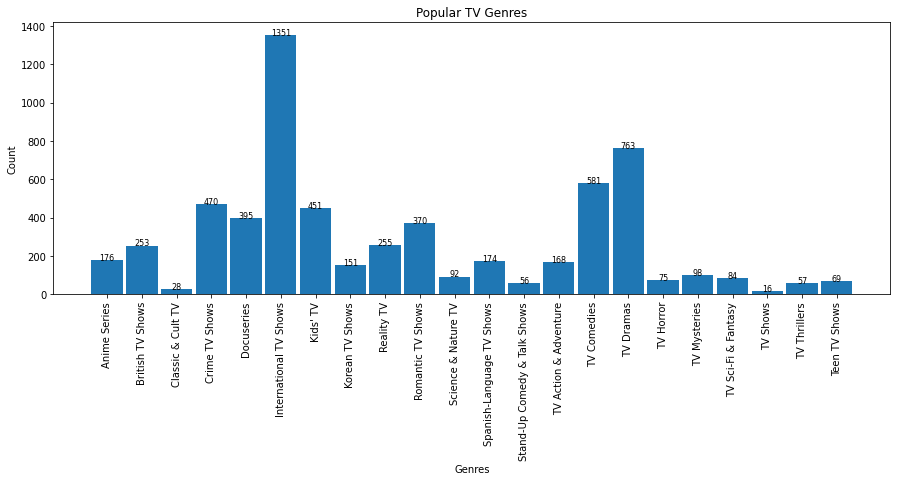

In [342]:
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(x_tv_val1,x_tv_val2,width=.9)
plt.xticks(x_tv_val1,rotation=90)
plt.title("Popular TV Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
for idx,val in enumerate(x_tv_val2):
    plt.text(idx,val+.2,str(val),fontsize=8,ha="center")
plt.show()

## **Observation: Popular TV Genres-Drama,International,Comedy,Crime,Kids TV**

In [64]:
lis_con=listed_df.merge(country_df[["country","show_id"]])
lis_con=lis_con.groupby(["country","listed"])["listed"].count().to_frame()
lis_con.rename(columns={"listed":"count"},inplace=True)
lis_con.reset_index(inplace=True)
to_del=lis_con.loc[lis_con["country"]==''].index
lis_con.drop(to_del,axis=0,inplace=True)
lis_con.reset_index(drop=True,inplace=True)
lis_con.sort_values("count",ascending=False,inplace=True)
lis_con_fil=lis_con.loc[lis_con["count"]>50]
lis_con_fil.reset_index(drop=True,inplace=False).head(20)

,country,listed,count
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
5,United States,Action & Adventure,404
6,United States,Children & Family Movies,390
7,United States,Independent Movies,390
8,India,Comedies,323
9,United States,Thrillers,292


## **Observation - Above frame shows some of the  top genres preffered in countries**

# **Analyse data wrt Country and Director**

In [53]:
idx=country_df.loc[country_df["country"]=="nan"].index
country_df.drop(idx,axis=0,inplace=True)



In [54]:
ixd=director_df.loc[director_df["director"]=="X"].index
director_df.drop(ixd,axis=0,inplace=True)


In [55]:
director_df.reset_index(drop=True,inplace=True)
director_df


,show_id,director,title,type
0,s1,Kirsten Johnson,Dick Johnson Is Dead,Movie
1,s3,Julien Leclercq,Ganglands,TV Show
2,s6,Mike Flanagan,Midnight Mass,TV Show
3,s7,Robert Cullen,My Little Pony: A New Generation,Movie
4,s7,José Luis Ucha,My Little Pony: A New Generation,Movie
...,...,...,...,...
6973,s8802,Majid Al Ansari,Zinzana,Movie
6974,s8803,David Fincher,Zodiac,Movie
6975,s8805,Ruben Fleischer,Zombieland,Movie
6976,s8806,Peter Hewitt,Zoom,Movie


In [190]:
director_df.value_counts("director").head(20)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Yılmaz Erdoğan          9
Quentin Tarantino       8
Fernando Ayllón         8
Troy Miller             8
Hakan Algül             8
dtype: int64

## **Observation-Top 20 Directors are listed above along with the number of Movie/TV shows directed by them**

In [56]:
country_df.reset_index(drop=True,inplace=True)
country_df

,show_id,country,title,type
0,s1,United States,Dick Johnson Is Dead,Movie
1,s2,South Africa,Blood & Water,TV Show
2,s5,India,Kota Factory,TV Show
3,s8,United States,Sankofa,Movie
4,s8,Ghana,Sankofa,Movie
...,...,...,...,...
10009,s8802,Jordan,Zinzana,Movie
10010,s8803,United States,Zodiac,Movie
10011,s8805,United States,Zombieland,Movie
10012,s8806,United States,Zoom,Movie


In [206]:
dir_cnt=dir_con.groupby(["country","director"])["director"].count().to_frame()
dir_cnt.rename(columns={"director":"count"},inplace=True)
dir_cnt.reset_index(["director","country"],inplace=True)

dir_cnt_fil=dir_cnt.loc[(dir_cnt["country"].str.contains('|'.join(['Canada', 'France', 'Spain', 'India', 'South Korea', 'Japan',
      'Mexico', 'United Sta',"United K"])))]
dir_cnt_fil=dir_cnt_fil.sort_values(["country","count"],ascending=[True,False])
dir_cnt_fil=dir_cnt_fil.groupby("country").head(3)
dir_cnt_fil.reset_index(drop=True,inplace=True)

dir_cnt_fil

,country,director,count
0,Canada,Justin G. Dyck,8
1,Canada,John Paul Tremblay,5
2,Canada,Mike Clattenburg,5
3,France,Thierry Donard,5
4,France,Youssef Chahine,4
5,France,Florent Bodin,3
6,India,Anurag Kashyap,9
7,India,David Dhawan,9
8,India,Umesh Mehra,8
9,Japan,Toshiya Shinohara,7


## **Recommendation-Top 3 directors country wise are shown above for eg:India-Anurag Kashyap,David Dhawan,Priyadarshan etc US-Jay Karas,Marcus Raboy and so on.Hence adding more of their work can fetch more viewers in the respective countries**

In [68]:
country_df_movie=country_df.loc[country_df["type"]=="Movie"]
country_df_tv=country_df.loc[country_df["type"]=="TV Show"]


In [70]:
country_df_movie
country_list_mv=country_df_movie["country"].to_list()


In [444]:
from collections import Counter
count_dict=Counter(country_list_mv)
dict_toplot=Counter()
for key in count_dict.keys():
    if count_dict[key]<50:
        dict_toplot['Others']+=count_dict[key]
        
    else:
        dict_toplot[key]=count_dict[key]
        
print(dict_toplot)

list_country=list(dict_toplot.keys())
list_country_count=list(dict_toplot.values())

Counter({'United States': 2751, 'India': 962, 'Others': 769, 'United Kingdom': 532, 'Canada': 319, 'France': 303, 'Germany': 182, 'Spain': 171, 'Japan': 119, 'China': 114, 'Mexico': 111, 'Egypt': 102, 'Hong Kong': 100, 'Nigeria': 94, 'Australia': 94, 'Indonesia': 86, 'Turkey': 83, 'Philippines': 80, 'Belgium': 78, 'Italy': 75, 'Argentina': 71, 'Brazil': 66, 'South Korea': 61, 'South Africa': 51})


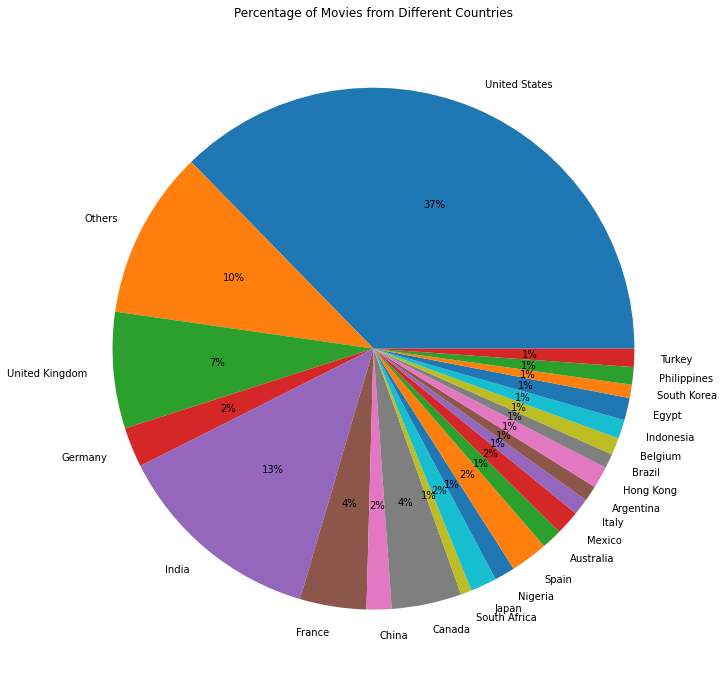

In [859]:
plt.rcParams["figure.figsize"] = (15,12)
data=list_country_count
labels=list_country
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.title("Percentage of Movies from Different Countries")
plt.show()

## **Observation-Most number of movies in Netflix comes from countries like US ,India,UK .**

In [78]:
country_df_tv
country_list_tv=country_df_tv["country"].to_list()

In [79]:
from collections import Counter
count_dict_tv=Counter(country_list_tv)
dict_toplot_tv=Counter()
for key in count_dict_tv.keys():
    if count_dict_tv[key]<30:
        dict_toplot_tv['Others']+=count_dict_tv[key]
        
    else:
        dict_toplot_tv[key]=count_dict_tv[key]
        
print(dict_toplot_tv)

list_country_tv=list(dict_toplot_tv.keys())
list_country_count_tv=list(dict_toplot_tv.values())

Counter({'United States': 938, 'Others': 321, 'United Kingdom': 272, 'Japan': 199, 'South Korea': 170, 'Canada': 126, 'France': 90, 'India': 84, 'Taiwan': 70, 'Australia': 66, 'Spain': 61, 'Mexico': 58, 'China': 48, 'Germany': 44, 'Colombia': 32, 'Brazil': 31, 'Turkey': 30})


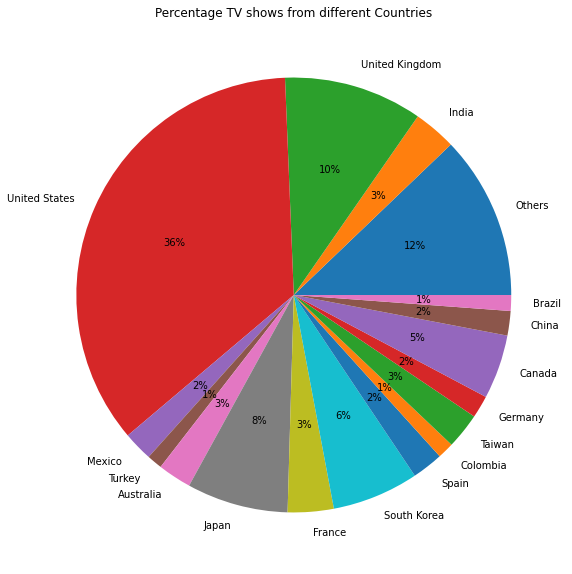

In [80]:
plt.rcParams["figure.figsize"] = (15,10)
data=list_country_count_tv
labels=list_country_tv
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.title("Percentage TV shows from different Countries")
plt.show()

## **Most number of TV shows in Netflix comes from countries like US ,UK,Japan,South Korea,Canada .**

# **Analyse data wrt Country and Cast**

In [81]:
cast_lst=df["cast"].apply(lambda x:str(x).split(", ")).to_list()
cast_lst



[['X'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['X'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Balint

In [82]:
cast_df=pd.DataFrame(cast_lst,index=df["show_id"])
cast_df=cast_df.stack()

cast_df=pd.DataFrame(cast_df)
cast_df.reset_index(inplace=True)
cast_df=cast_df[["show_id",0]]
cast_df.columns=["show_id","cast"]
cast_df=cast_df.merge(df[["show_id","title","type"]])
ind=cast_df.loc[cast_df["cast"]=='X'].index
cast_df.drop(ind,axis=0,inplace=True)
cast_df.describe(include="object")

,show_id,cast,title,type
count,64126,64126,64126,64126
unique,7982,36439,7982,2
top,s3775,Anupam Kher,Black Mirror,Movie
freq,50,43,50,44475


In [83]:
cast_df

,show_id,cast,title,type
1,s2,Ama Qamata,Blood & Water,TV Show
2,s2,Khosi Ngema,Blood & Water,TV Show
3,s2,Gail Mabalane,Blood & Water,TV Show
4,s2,Thabang Molaba,Blood & Water,TV Show
5,s2,Dillon Windvogel,Blood & Water,TV Show
...,...,...,...,...
64946,s8807,Manish Chaudhary,Zubaan,Movie
64947,s8807,Meghna Malik,Zubaan,Movie
64948,s8807,Malkeet Rauni,Zubaan,Movie
64949,s8807,Anita Shabdish,Zubaan,Movie


In [93]:
country_df

,show_id,country,title,type
0,s1,United States,Dick Johnson Is Dead,Movie
1,s2,South Africa,Blood & Water,TV Show
2,s5,India,Kota Factory,TV Show
3,s8,United States,Sankofa,Movie
4,s8,Ghana,Sankofa,Movie
...,...,...,...,...
10009,s8802,Jordan,Zinzana,Movie
10010,s8803,United States,Zodiac,Movie
10011,s8805,United States,Zombieland,Movie
10012,s8806,United States,Zoom,Movie


In [94]:
cast_con=cast_df.merge(country_df[["country","show_id"]])
cast_con


,show_id,cast,title,type,country
0,s2,Ama Qamata,Blood & Water,TV Show,South Africa
1,s2,Khosi Ngema,Blood & Water,TV Show,South Africa
2,s2,Gail Mabalane,Blood & Water,TV Show,South Africa
3,s2,Thabang Molaba,Blood & Water,TV Show,South Africa
4,s2,Dillon Windvogel,Blood & Water,TV Show,South Africa
...,...,...,...,...,...
75800,s8807,Manish Chaudhary,Zubaan,Movie,India
75801,s8807,Meghna Malik,Zubaan,Movie,India
75802,s8807,Malkeet Rauni,Zubaan,Movie,India
75803,s8807,Anita Shabdish,Zubaan,Movie,India


In [104]:
cast_cnt=cast_cnt.sort_values(["count","country"],ascending=[False,True])
top_20=cast_cnt.head(20)
top_20.reset_index(drop=True,inplace=True)
top_20

,country,cast,count
0,India,Anupam Kher,40
1,India,Shah Rukh Khan,34
2,India,Naseeruddin Shah,31
3,India,Akshay Kumar,29
4,India,Om Puri,29
5,Japan,Takahiro Sakurai,29
6,India,Amitabh Bachchan,28
7,India,Paresh Rawal,28
8,Japan,Yuki Kaji,28
9,India,Boman Irani,27


## **Observation -The above shows the top 20 Popular actors in the platform**

In [97]:
cast_cnt=cast_con.groupby(["country","cast"])["cast"].count().to_frame()
cast_cnt.rename(columns={"cast":"count"},inplace=True)
cast_cnt.reset_index(["cast","country"],inplace=True)
to_del=cast_cnt.loc[cast_cnt["country"]==''].index
cast_cnt.drop(to_del,axis=0,inplace=True)

cast_cnt.reset_index(drop=True,inplace=True)
cast_cnt=cast_cnt.sort_values(["count","country"],ascending=[False,True])
cast_cnt=cast_cnt.loc[cast_cnt["count"]>10]

top_cast=(cast_cnt.groupby("country").head(3)).sort_values("country")
top_cast.reset_index(drop=True,inplace=True)
top_cast


,country,cast,count
0,Canada,Ashleigh Ball,12
1,Canada,John Paul Tremblay,14
2,Canada,Robb Wells,14
3,Egypt,Hassan Hosny,13
4,Egypt,Ahmed Helmy,13
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,Japan,Takahiro Sakurai,29
9,Japan,Yuki Kaji,28


## **Recommendation-Top 3 Popular Actors in Netflix in each of the Countries where the total count of their movie/TV show is greater than 10.Hence adding more content of these actors will fetch more viewers from their respective countries**

# **Analyse data wrt Rating**

# ***Source https://help.netflix.com/en/node/2064/us***

In [105]:

df.insert(9,"target_aud",'')


In [668]:

rate_idx=df.loc[df["rating"].isin(["PG","G",'TV-Y','TV-Y7','TV-G','TV-PG'])].index
rate_idx

Int64Index([   6,   13,   22,   23,   26,   34,   37,   39,   40,   41,
            ...
            8786, 8787, 8789, 8793, 8795, 8796, 8797, 8800, 8803, 8805],
           dtype='int64', length=2052)

In [669]:
df.loc[rate_idx,["target_aud"]]='Kids'

In [670]:
rate_idx=df.loc[df["rating"].isin(["PG-13","TV-14"])].index
rate_idx

Int64Index([   0,    8,    9,   18,   20,   21,   24,   25,   27,   28,
            ...
            8766, 8767, 8770, 8771, 8772, 8774, 8782, 8794, 8799, 8806],
           dtype='int64', length=2650)

In [671]:
df.loc[rate_idx,["target_aud"]]='Teens'
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,target_aud,target_aug,duration,listed_in,description,Date,Month,Year,Mon
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,X,United States,"September 25, 2021",2020,PG-13,Teens,,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,September,2021,9
1,s2,TV Show,Blood & Water,X,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,,,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,September,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,,,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,September,2021,9
3,s4,TV Show,Jailbirds New Orleans,X,X,NaN,"September 24, 2021",2021,TV-MA,,,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,September,2021,9
4,s5,TV Show,Kota Factory,X,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,,,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,September,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,,,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,November,2019,11
8803,s8804,TV Show,Zombie Dumb,X,X,NaN,"July 1, 2019",2018,TV-Y7,Kids,,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,July,2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,,,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,November,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,Kids,,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,January,2020,1


In [672]:
rate_idx=df.loc[df["rating"].isin(["R","TV-MA","NC-17"])].index
rate_idx

Int64Index([   1,    2,    3,    4,    5,    7,   10,   11,   12,   14,
            ...
            8762, 8765, 8768, 8769, 8788, 8791, 8798, 8801, 8802, 8804],
           dtype='int64', length=4009)

In [673]:
df.loc[rate_idx,["target_aud"]]='Adults'


In [679]:
df.loc[~df["target_aud"].isin(["Kids","Adults","Teens"])]["rating"].unique()


array(['74 min', '84 min', '66 min', 'NR', nan, 'TV-Y7-FV', 'UR'],
      dtype=object)

In [681]:
rate_idx=df.loc[df["rating"].isin(["NR","UR"])].index
rate_idx

83

In [682]:
df.loc[rate_idx,["target_aud"]]='Adults'


In [685]:
rate_idx=df.loc[df["rating"].isin(['TV-Y7-FV'])].index
rate_idx
df.loc[rate_idx,["target_aud"]]='Teens'

In [686]:
rate_idx=df.loc[df["rating"].isin(['74 min', '84 min', '66 min', np.nan])].index
rate_idx
df.loc[rate_idx,["target_aud"]]='Not Available'

In [690]:
rating_df=country_df.merge(df[["target_aud","show_id"]])

In [691]:
rating_df

,show_id,country,title,type,target_aud
0,s1,United States,Dick Johnson Is Dead,Movie,Teens
1,s2,South Africa,Blood & Water,TV Show,Adults
2,s5,India,Kota Factory,TV Show,Adults
3,s8,United States,Sankofa,Movie,Adults
4,s8,Ghana,Sankofa,Movie,Adults
...,...,...,...,...,...
10009,s8802,Jordan,Zinzana,Movie,Adults
10010,s8803,United States,Zodiac,Movie,Adults
10011,s8805,United States,Zombieland,Movie,Adults
10012,s8806,United States,Zoom,Movie,Kids


In [709]:
rating_cnt=rating_df.groupby(["country","target_aud"])["target_aud"].count().to_frame()
rating_cnt.rename(columns={"target_aud":"count"},inplace=True)
rating_cnt.reset_index(inplace=True)
to_del=rating_cnt.loc[rating_cnt["country"]==''].index
rating_cnt.drop(to_del,axis=0,inplace=True)
rating_cnt.reset_index(drop=True,inplace=True)
rating_cnt

,country,target_aud,count
0,Afghanistan,Adults,1
1,Albania,Adults,1
2,Algeria,Adults,2
3,Algeria,Teens,1
4,Angola,Adults,1
...,...,...,...
266,West Germany,Adults,3
267,West Germany,Kids,1
268,West Germany,Teens,1
269,Zimbabwe,Adults,2


In [836]:
top_country=rating_cnt.groupby("country")["count"].sum().sort_values(ascending=False).head(20)
top_country=top_country.reset_index()["country"].to_list()
top_country
top_country_df=rating_cnt.loc[rating_cnt["country"].isin(top_country)]
top_country_df.reset_index(drop=False,inplace=True)
top_country_df.drop("index",axis=1,inplace=True)
to_del=top_country_df.loc[top_country_df["target_aud"]=='Not Available'].index
top_country_df.drop(to_del,axis=0,inplace=True)
top_country_df



,country,target_aud,count
0,Argentina,Adults,71
1,Argentina,Kids,10
2,Argentina,Teens,10
3,Australia,Adults,68
4,Australia,Kids,59
6,Australia,Teens,32
7,Brazil,Adults,64
8,Brazil,Kids,20
9,Brazil,Teens,13
10,Canada,Adults,192


In [837]:
def cal_percent(x):
    ans=x*100/x.sum()
    return round(ans,2)


In [838]:
top_country_df["percent"]=top_country_df.groupby("country")["count"].transform(cal_percent)

In [839]:
top_country_df

,country,target_aud,count,percent
0,Argentina,Adults,71,78.02
1,Argentina,Kids,10,10.99
2,Argentina,Teens,10,10.99
3,Australia,Adults,68,42.77
4,Australia,Kids,59,37.11
6,Australia,Teens,32,20.13
7,Brazil,Adults,64,65.98
8,Brazil,Kids,20,20.62
9,Brazil,Teens,13,13.40
10,Canada,Adults,192,43.15


In [840]:
heatmap_df=top_country_df.pivot_table(index=["country"],columns="target_aud",values="percent")
heatmap_df=heatmap_df[["Kids","Teens","Adults"]]
heatmap_df


target_aud,Kids,Teens,Adults
country,,,
Argentina,10.99,10.99,78.02
Australia,37.11,20.13,42.77
Brazil,20.62,13.40,65.98
Canada,38.43,18.43,43.15
China,20.99,44.44,34.57
Egypt,5.98,65.81,28.21
France,21.12,21.12,57.76
Germany,19.47,25.66,54.87
Hong Kong,6.67,41.90,51.43


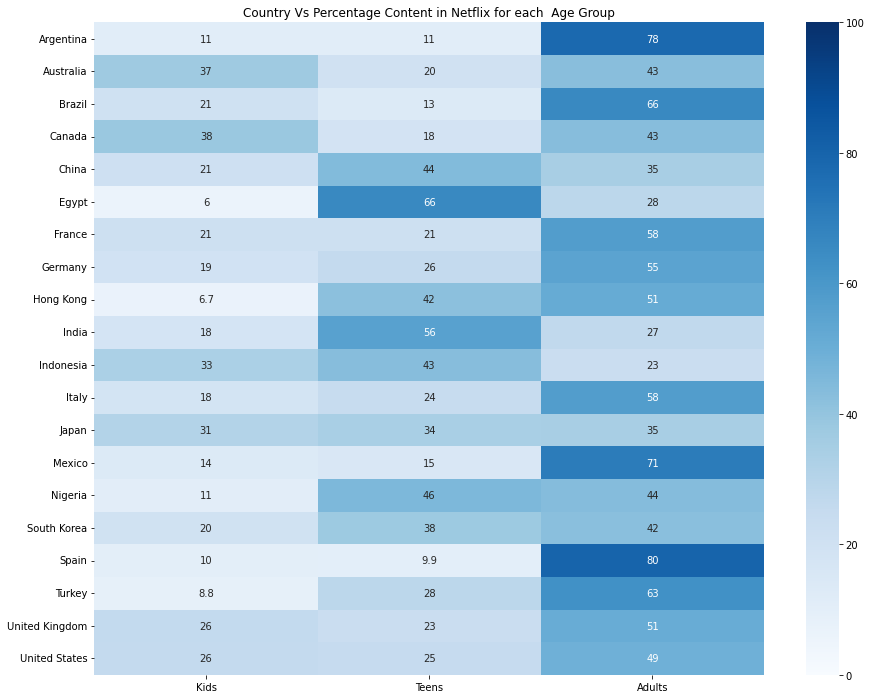

In [851]:
sns.heatmap(heatmap_df,annot=True,cmap="Blues",vmin=0,vmax=100)
plt.xlabel('')
plt.ylabel('')
plt.title("Country Vs Percentage Content in Netflix for each  Age Group")

plt.show()

## **Recommendation-Most of the Asian countries like India,Indonesia,Hongkong,China targets on Teen Audiences ,while most of the Western and European countries targets Adult audiences.So adding content belonging to those categories for  respective countries can fetch more audience**

## **Recommendation -It is also observed that countries like Spain,Mexico,Argentina have very less content added for the Teen audiences compared to other age groups.Hence adding more content for them can improve the business for Netflix in those countries.**

## **Recommendation-Countries like Turkey,Hongkong,Egypt have less content added for Kids compared to other age groups.Hence adding more content in for them as well can improve the business in those countries.For instance country like Egypt has a higher density of population in 5-14 Age group (Source:https://www.populationpyramid.net/egypt/2020/)**

In [106]:
country_df

,show_id,country,title,type
0,s1,United States,Dick Johnson Is Dead,Movie
1,s2,South Africa,Blood & Water,TV Show
2,s5,India,Kota Factory,TV Show
3,s8,United States,Sankofa,Movie
4,s8,Ghana,Sankofa,Movie
...,...,...,...,...
10009,s8802,Jordan,Zinzana,Movie
10010,s8803,United States,Zodiac,Movie
10011,s8805,United States,Zombieland,Movie
10012,s8806,United States,Zoom,Movie


In [144]:
con_show=country_df.groupby("title")["title"].count().to_frame()
con_show.rename(columns={"title":"No:of country"},inplace=True)
con_show.reset_index(inplace=True)
to_show=con_show.sort_values(["No:of country"],ascending=False).head(20)
to_show.reset_index(drop=True,inplace=True)

to_show

,title,No:of country
0,Barbecue,12
1,The Look of Silence,10
2,The Professor and the Madman,8
3,Shaun the Sheep,8
4,Domino,7
5,The Take,7
6,The Congress,7
7,Arctic Dogs,7
8,The Breadwinner,7
9,Nymphomaniac: Volume II,6


## **Recommnebdation-The above shows the movies and the number of their producing countries.Adding content which was produced by multiple countries can improve business**

# **Analyse wrt to time gap**

## **Time gap :difference between the release year and year the content was added in the platform**

In [154]:
df["gap"]=df["Year"]-df["release_year"]
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,target_aud,duration,listed_in,description,Date,Month,Mon,Year,gap
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,X,United States,"September 25, 2021",2020,PG-13,,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,September,9,2021,1
1,s2,TV Show,Blood & Water,X,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,September,9,2021,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,September,9,2021,0
3,s4,TV Show,Jailbirds New Orleans,X,X,NaN,"September 24, 2021",2021,TV-MA,,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,September,9,2021,0
4,s5,TV Show,Kota Factory,X,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,September,9,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,November,11,2019,12
8803,s8804,TV Show,Zombie Dumb,X,X,NaN,"July 1, 2019",2018,TV-Y7,,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,July,7,2019,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,November,11,2019,10
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,January,1,2020,14


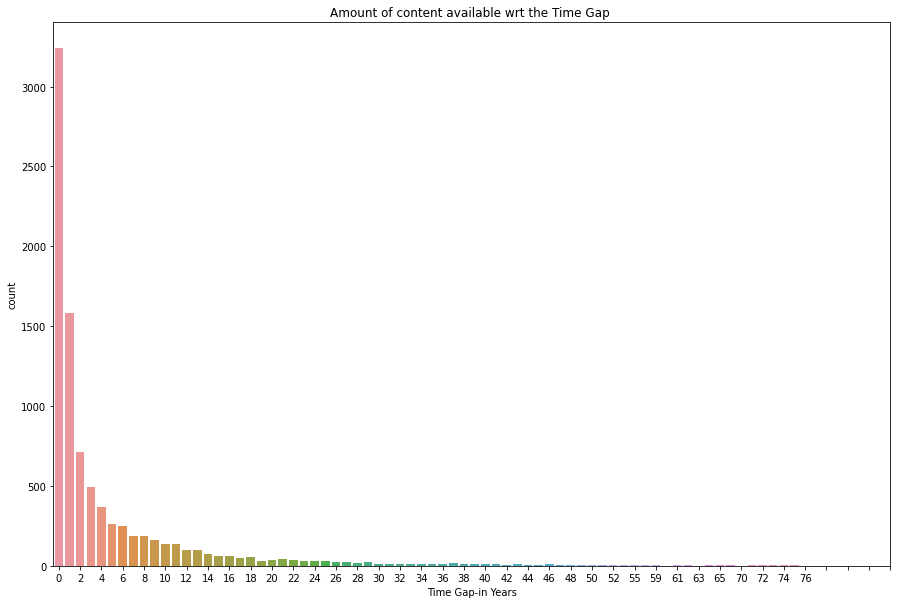

In [175]:
gap=df.loc[df["gap"]>=0]
sns.countplot(x="gap",data=gap)
plt.xticks(np.arange(0,80,2))
plt.xlabel("Time Gap-in Years")
plt.title("Amount of content available wrt the Time Gap ")
#plt.yticks(np.arange(1920,2030,10))
plt.show()

## **Recommendation-Adding newer content in the platform favours more audience.The above plot proves the same.**